**Basic EDA after reading csv files**

In [2]:
import pandas as pd
import numpy as np

In [3]:
#read bookings csv file

df_bookings=pd.read_csv(r'E:\Codebasics\Doc\Python Projects\64101194a2364\source-code\3_project_hospitality_analysis\datasets\fact_bookings.csv')

In [5]:
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [4]:
df_bookings.shape

(134590, 12)

In [7]:
#get various room categories
df_bookings['room_category'].unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [14]:
#no of unique values in booking_platform column
df_bookings['booking_platform'].value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: ylabel='booking_platform'>

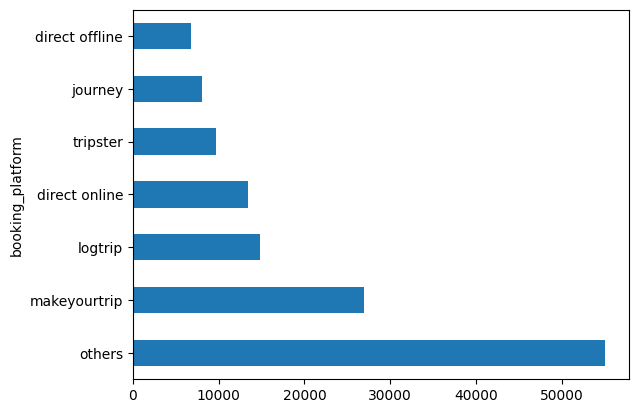

In [16]:
#visualize above data in bar chart
df_bookings['booking_platform'].value_counts().plot(kind='barh')

In [19]:
#read remaining csv files

df_date=pd.read_csv(r'E:\Codebasics\Doc\Python Projects\64101194a2364\source-code\3_project_hospitality_analysis\datasets\dim_date.csv')
df_hotels=pd.read_csv(r'E:\Codebasics\Doc\Python Projects\64101194a2364\source-code\3_project_hospitality_analysis\datasets\dim_hotels.csv')
df_rooms=pd.read_csv(r'E:\Codebasics\Doc\Python Projects\64101194a2364\source-code\3_project_hospitality_analysis\datasets\dim_rooms.csv')
df_agg_bookings=pd.read_csv(r'E:\Codebasics\Doc\Python Projects\64101194a2364\source-code\3_project_hospitality_analysis\datasets\fact_aggregated_bookings.csv')

In [19]:
#get number of unique category values along with count
df_hotels['category'].value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

<Axes: xlabel='city'>

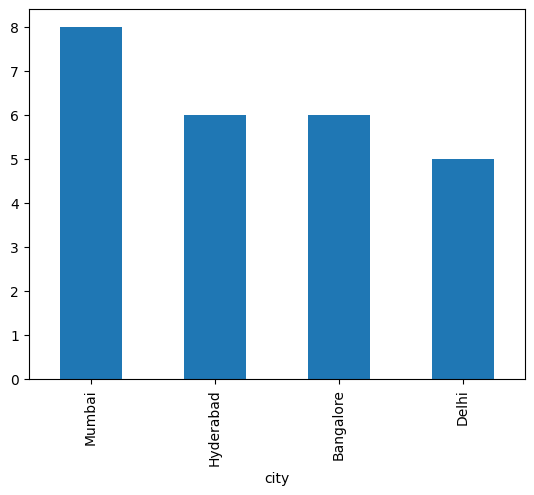

In [23]:
#get number of hotels in each city
df_hotels['city'].value_counts().sort_values(ascending=False).plot(kind='bar')

**Exercise-1. Find out unique property ids in aggregate bookings dataset**

In [27]:
df_agg_bookings['property_id'].unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

**Exercise-2. Find out total bookings per property_id**

In [47]:
df_bookings.groupby('property_id')['booking_id'].count()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7147
17558    5036
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4728
19558    4371
19559    4705
19560    5979
19561    5736
19562    5812
19563    5413
Name: booking_id, dtype: int64

**Exercise-3. Find out days on which bookings are greater than capacity**

In [58]:
df_agg_bookings[df_agg_bookings['successful_bookings'] > df_agg_bookings['capacity']]['check_in_date'].drop_duplicates()

3        1-May-22
4136    11-Jun-22
6209     2-Jul-22
8522    25-Jul-22
9194    31-Jul-22
Name: check_in_date, dtype: object

**Exercise-4. Find out properties that have highest capacity**

In [79]:
a = max(df_agg_bookings['capacity'])

df_cap_max=df_agg_bookings[df_agg_bookings['capacity']==a]

pd.merge(df_cap_max,df_hotels,on='property_id')[['property_id','property_name','category','city']].drop_duplicates()

,property_id,property_name,category,city
0,17558,Atliq Grands,Luxury,Mumbai


**Data Cleaning**

In [80]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [82]:
#we cannot have negetive or 0 values in no_quests (as we see there are some -ve values)
df_bookings[df_bookings['no_guests']<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [83]:
#we keep only those records where no_quests > 0
df_bookings=df_bookings[df_bookings['no_guests']>0]
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [84]:
#lets sheck the min and max values of revenue_generated (we see the max revenue is way high then it makes sense as it contains records for only 
#1 booking)
min(df_bookings['revenue_generated']), max(df_bookings['revenue_generated'])

(6500, 28560000)

In [8]:
avg,sd = df_bookings['revenue_generated'].mean(), df_bookings['revenue_generated'].std()

avg,sd

(np.float64(15378.05412734973), np.float64(93036.03867095453))

In [9]:
#calculate higher and lower limits(avg + - 3 std)
higher_limit = avg + 3*sd
lower_limit = avg - 3*sd

In [91]:
#these records are outliers on the higher side
df_bookings[df_bookings['revenue_generated'] > higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [10]:
#we remove the records containing outlier values
df_bookings = df_bookings[df_bookings['revenue_generated'] <= higher_limit]
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [93]:
df_bookings['revenue_realized'].describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [97]:
#checking outliers on higher level in revenue_realized 
higher_limit = df_bookings['revenue_realized'].mean() + 3* df_bookings['revenue_realized'].std()

np.float64(33479.358661845814)

In [109]:
#if we cjeck the records, then we would realize that all the records which are outliers are all in RT4 room category
df_bookings[df_bookings['revenue_realized']==df_bookings['revenue_realized'].max()]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
715,May012217560RT46,17560,28-04-22,1/5/2022,2/5/2022,6.0,RT4,makeyourtrip,3.0,Checked Out,45220,45220
719,May012217560RT410,17560,1/5/2022,1/5/2022,4/5/2022,6.0,RT4,others,2.0,Checked Out,45220,45220
2107,May022216559RT47,16559,28-04-22,2/5/2022,4/5/2022,6.0,RT4,logtrip,NaN,Checked Out,45220,45220
2381,May022217558RT42,17558,25-04-22,2/5/2022,8/5/2022,6.0,RT4,makeyourtrip,3.0,Checked Out,45220,45220
...,...,...,...,...,...,...,...,...,...,...,...,...
132069,Jul302217563RT414,17563,30-07-22,30-07-22,3/8/2022,6.0,RT4,logtrip,NaN,Checked Out,45220,45220
133389,Jul312217558RT42,17558,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,2.0,Checked Out,45220,45220
133453,Jul312217559RT45,17559,26-07-22,31-07-22,6/8/2022,6.0,RT4,makeyourtrip,5.0,Checked Out,45220,45220
133456,Jul312217559RT48,17559,29-07-22,31-07-22,2/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,45220,45220


In [111]:
#RT4 is presidential room which is the costliest room class, hence we can conclude that they are not outliers
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [113]:
#check nas in df_bookings, here we see there are many nas in ratings_given, which is fine as not all og the guests will give ratings
df_bookings.isna().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

**Exercise-1. In aggregate bookings find columns that have null values. Fill these null values with whatever you think is the appropriate subtitute (possible ways is to use mean or median)**

In [114]:
df_agg_bookings.isna().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [117]:
#there are 2 records where capacity is Nan
df_agg_bookings[df_agg_bookings['capacity'].isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [20]:
#replace Nan with median
df_agg_bookings['capacity']=df_agg_bookings.capacity.replace(np.nan,df_agg_bookings.capacity.median())

In [21]:
#there are 0 records where capacity is Nan
df_agg_bookings.isna().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

**Exercise-2. In aggregate bookings find out records that have successful_bookings value greater than capacity. Filter those records**

In [22]:
df_agg_bookings[df_agg_bookings['successful_bookings'] > df_agg_bookings['capacity']]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [24]:
df_agg_bookings = df_agg_bookings[df_agg_bookings['successful_bookings'] <= df_agg_bookings['capacity']]

In [25]:
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


**Data Transformation**

In [28]:
#get occupancy percentage
df_agg_bookings['occpct']=round((df_agg_bookings['successful_bookings']/df_agg_bookings['capacity'])*100,2)

In [29]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occpct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00


**Insight Generation**

**1. What is an average occupancy rate in each of the room categories?**

In [30]:
df_agg_bookings.groupby('room_category')['occpct'].mean()

room_category
RT1    57.889643
RT2    58.009756
RT3    58.028213
RT4    59.277925
Name: occpct, dtype: float64

In [32]:
df = pd.merge(df_agg_bookings,df_rooms,left_on='room_category',right_on='room_id',how='inner')

In [33]:
df

,property_id,check_in_date,room_category,successful_bookings,capacity,occpct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard
4,17560,1-May-22,RT1,28,40.0,70.00,RT1,Standard
...,...,...,...,...,...,...,...,...
9189,16563,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9190,16559,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9191,17558,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential
9192,19563,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential


In [38]:
df.groupby(['room_id','room_class'])['occpct'].mean().round(2)

room_id  room_class  
RT1      Standard        57.89
RT2      Elite           58.01
RT3      Premium         58.03
RT4      Presidential    59.28
Name: occpct, dtype: float64

**2. Print average occupancy rate per city**

In [39]:
df_hotels

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi
5,16563,Atliq Palace,Business,Delhi
6,17558,Atliq Grands,Luxury,Mumbai
7,17559,Atliq Exotica,Luxury,Mumbai
8,17560,Atliq City,Business,Mumbai
9,17561,Atliq Blu,Luxury,Mumbai


In [48]:
df1=pd.merge(df,df_hotels,on='property_id',how='inner')
df1

,property_id,check_in_date,room_category,successful_bookings,capacity,occpct,room_id,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard,Atliq Palace,Business,Bangalore
3,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard,Atliq Grands,Luxury,Delhi
4,17560,1-May-22,RT1,28,40.0,70.00,RT1,Standard,Atliq City,Business,Mumbai
...,...,...,...,...,...,...,...,...,...,...,...
9189,16563,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential,Atliq Palace,Business,Delhi
9190,16559,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential,Atliq Exotica,Luxury,Mumbai
9191,17558,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential,Atliq Grands,Luxury,Mumbai
9192,19563,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential,Atliq Palace,Business,Bangalore


In [42]:
df1.groupby('city')['occpct'].mean().round(2)

city
Bangalore    56.33
Delhi        61.51
Hyderabad    58.12
Mumbai       57.91
Name: occpct, dtype: float64

**3. When was the occupancy better? Weekday or Weekend?**

In [47]:
df2=pd.merge(df1,df_date,left_on='check_in_date',right_on='date')

df2

,property_id,check_in_date,room_category,successful_bookings,capacity,occpct,room_id,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.72,RT3,Premium,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.33,RT1,Standard,Atliq City,Business,Hyderabad,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.00,RT1,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday
3,19563,10-May-22,RT1,16,30.0,53.33,RT1,Standard,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
4,17558,10-May-22,RT1,11,19.0,57.89,RT1,Standard,Atliq Grands,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,16563,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential,Atliq Palace,Business,Delhi,31-Jul-22,Jul 22,W 32,weekend
6493,16559,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential,Atliq Exotica,Luxury,Mumbai,31-Jul-22,Jul 22,W 32,weekend
6494,17558,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential,Atliq Grands,Luxury,Mumbai,31-Jul-22,Jul 22,W 32,weekend
6495,19563,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential,Atliq Palace,Business,Bangalore,31-Jul-22,Jul 22,W 32,weekend


In [46]:
df2.groupby('day_type')['occpct'].mean().round(2)

day_type
weekeday    50.88
weekend     72.34
Name: occpct, dtype: float64

**4: In the month of June, what is the occupancy for different cities**

In [59]:
df_june_22=df2[df2['mmm yy']=='Jun 22']
df_june_22

,property_id,check_in_date,room_category,successful_bookings,capacity,occpct,room_id,room_class,property_name,category,city,date,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,66.67,RT1,Standard,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2201,19562,10-Jun-22,RT1,19,30.0,63.33,RT1,Standard,Atliq Bay,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2202,19563,10-Jun-22,RT1,17,30.0,56.67,RT1,Standard,Atliq Palace,Business,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2203,17558,10-Jun-22,RT1,9,19.0,47.37,RT1,Standard,Atliq Grands,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2204,16558,10-Jun-22,RT1,11,19.0,57.89,RT1,Standard,Atliq Grands,Luxury,Delhi,10-Jun-22,Jun 22,W 24,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4294,17562,30-Jun-22,RT4,3,6.0,50.00,RT4,Presidential,Atliq Bay,Luxury,Mumbai,30-Jun-22,Jun 22,W 27,weekeday
4295,19563,30-Jun-22,RT4,3,6.0,50.00,RT4,Presidential,Atliq Palace,Business,Bangalore,30-Jun-22,Jun 22,W 27,weekeday
4296,16560,30-Jun-22,RT4,3,7.0,42.86,RT4,Presidential,Atliq City,Business,Delhi,30-Jun-22,Jun 22,W 27,weekeday
4297,19558,30-Jun-22,RT4,3,7.0,42.86,RT4,Presidential,Atliq Grands,Luxury,Bangalore,30-Jun-22,Jun 22,W 27,weekeday


In [62]:
df_june_22.groupby('city')['occpct'].mean().round(2).sort_values()

city
Bangalore    56.44
Mumbai       58.38
Hyderabad    58.46
Delhi        62.47
Name: occpct, dtype: float64

**5: We got new data for the month of august. Append that to existing data**

In [64]:
#read new august data
df_august=pd.read_csv(r'E:\Codebasics\Doc\Python Projects\64101194a2364\source-code\3_project_hospitality_analysis\datasets\new_data_august.csv')
df_august

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92
5,17561,Atliq Blu,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,18,26,69.23
6,17564,Atliq Seasons,Business,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,10,16,62.50


In [66]:
df_latest=pd.concat([df,df_august],ignore_index=True)
df_latest

,property_id,check_in_date,room_category,successful_bookings,capacity,occpct,room_id,room_class,property_name,category,city,mmm yy,week no,day_type,occ%
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17560,1-May-22,RT1,28,40.0,70.00,RT1,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9196,19563,01-Aug-22,RT1,23,30.0,NaN,NaN,Standard,Atliq Palace,Business,Bangalore,Aug-22,W 32,weekeday,76.67
9197,19558,01-Aug-22,RT1,30,40.0,NaN,NaN,Standard,Atliq Grands,Luxury,Bangalore,Aug-22,W 32,weekeday,75.00
9198,19560,01-Aug-22,RT1,20,26.0,NaN,NaN,Standard,Atliq City,Business,Bangalore,Aug-22,W 32,weekeday,76.92
9199,17561,01-Aug-22,RT1,18,26.0,NaN,NaN,Standard,Atliq Blu,Luxury,Mumbai,Aug-22,W 32,weekeday,69.23


In [67]:
df_latest.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occpct', 'room_id', 'room_class', 'property_name',
       'category', 'city', 'mmm yy', 'week no', 'day_type', 'occ%'],
      dtype='object')

**6. Print revenue realized per city**

In [70]:
df_bookings_all=pd.merge(df_bookings,df_hotels,on='property_id')

In [71]:
df_bookings_all

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
3,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
4,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134580,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai
134581,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760,Atliq Seasons,Business,Mumbai
134582,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai
134583,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai


In [74]:
df_bookings_all.groupby('city')['revenue_realized'].sum()

city
Bangalore    420397050
Delhi        294466018
Hyderabad    325232870
Mumbai       668608011
Name: revenue_realized, dtype: int64

**7. Print month by month revenue**

In [86]:
#convert object to date for df_bookings_all
df_bookings_all['check_in_date']=pd.to_datetime(df_bookings_all['check_in_date'],format='mixed')
df_bookings_all

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-22,2022-01-05,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT14,16558,28-04-22,2022-01-05,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
3,May012216558RT15,16558,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
4,May012216558RT16,16558,1/5/2022,2022-01-05,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134580,Jul312217564RT46,17564,29-07-22,2022-07-31,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai
134581,Jul312217564RT47,17564,30-07-22,2022-07-31,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760,Atliq Seasons,Business,Mumbai
134582,Jul312217564RT48,17564,30-07-22,2022-07-31,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai
134583,Jul312217564RT49,17564,29-07-22,2022-07-31,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai


In [87]:
#convert object to date for df_bookings_all
df_date['date']=pd.to_datetime(df_date['date'],format='%d-%b-%y')
df_date

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday
4,2022-05-05,May 22,W 19,weekeday
...,...,...,...,...
87,2022-07-27,Jul 22,W 31,weekeday
88,2022-07-28,Jul 22,W 31,weekeday
89,2022-07-29,Jul 22,W 31,weekeday
90,2022-07-30,Jul 22,W 31,weekend


In [88]:
df_month_booking_all=pd.merge(df_bookings_all,df_date,left_on='check_in_date',right_on='date')

In [89]:
df_month_booking_all

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
3,May052216558RT14,16558,3/5/2022,2022-05-05,6/5/2022,2.0,RT1,tripster,3.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
4,May052216558RT15,16558,30-04-22,2022-05-05,10/5/2022,4.0,RT1,others,4.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92575,Jul312217564RT46,17564,29-07-22,2022-07-31,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai,2022-07-31,Jul 22,W 32,weekend
92576,Jul312217564RT47,17564,30-07-22,2022-07-31,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760,Atliq Seasons,Business,Mumbai,2022-07-31,Jul 22,W 32,weekend
92577,Jul312217564RT48,17564,30-07-22,2022-07-31,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai,2022-07-31,Jul 22,W 32,weekend
92578,Jul312217564RT49,17564,29-07-22,2022-07-31,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai,2022-07-31,Jul 22,W 32,weekend


In [91]:
df_month_booking_all.groupby('mmm yy')['revenue_realized'].sum().sort_values(ascending=True)

mmm yy
Jun 22    377191229
Jul 22    389993172
May 22    408375641
Name: revenue_realized, dtype: int64

**Exercise-1. Print revenue realized per hotel type**

In [105]:
df_month_booking_all.groupby('property_name')['revenue_realized'].sum().sort_values(ascending=True)

property_name
Atliq Seasons     45959517
Atliq Grands     145860641
Atliq Blu        179203544
Atliq Bay        179416721
Atliq City       196568883
Atliq Palace     209474575
Atliq Exotica    219076161
Name: revenue_realized, dtype: int64

**Exercise-2 Print average rating per city**

In [104]:
df_month_booking_all.groupby('city')['ratings_given'].mean().round(2).sort_values(ascending=False)

city
Delhi        3.78
Hyderabad    3.66
Mumbai       3.64
Bangalore    3.40
Name: ratings_given, dtype: float64

**Exercise-3 Print a pie chart of revenue realized per booking platform**

<Axes: ylabel='revenue_realized'>

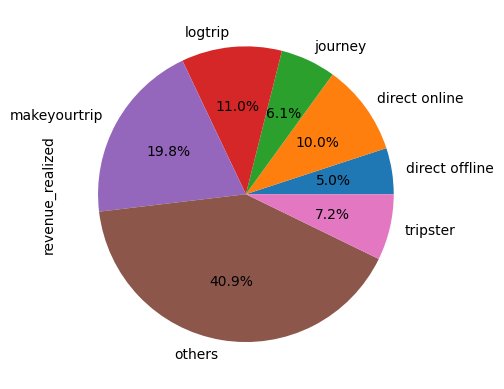

In [103]:
df_month_booking_all.groupby('booking_platform')['revenue_realized'].sum().plot.pie(autopct='%1.1f%%')